# Evaluation Project - 2
HR Analytics Project- Understanding the Attrition in HR
Problem Statement:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score


In [2]:
hr_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr_data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1392,35,No,Travel_Rarely,1224,Sales,7,4,Life Sciences,1,1962,...,4,80,0,10,2,3,10,8,0,9
1150,35,No,Travel_Rarely,819,Research & Development,18,5,Life Sciences,1,1621,...,4,80,0,16,2,3,16,15,1,10
546,29,No,Travel_Rarely,1396,Sales,10,3,Life Sciences,1,749,...,3,80,0,1,6,3,1,0,0,0
1375,32,Yes,Travel_Frequently,238,Research & Development,5,2,Life Sciences,1,1939,...,1,80,0,8,2,3,4,1,0,3
1347,36,No,Travel_Frequently,1213,Human Resources,2,1,Human Resources,1,1890,...,4,80,0,10,2,2,10,1,0,8
240,39,No,Travel_Rarely,1431,Research & Development,1,4,Medical,1,332,...,3,80,3,7,1,3,3,2,1,2
1218,41,No,Travel_Rarely,918,Sales,6,3,Marketing,1,1708,...,2,80,0,10,3,3,10,8,8,7
944,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,1,1315,...,1,80,3,10,6,3,9,8,7,5
1143,45,No,Non-Travel,336,Sales,26,3,Marketing,1,1612,...,1,80,1,10,2,3,10,7,4,5
410,30,No,Travel_Rarely,317,Research & Development,2,3,Life Sciences,1,548,...,3,80,0,11,2,3,5,4,0,2


In [3]:
hr_data.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
missing_val = {}
for i in hr_data.columns:
    if hr_data[i].isnull().sum() >0:
        missing_val[i] = hr_data[i].isnull().sum()
print(missing_val)

{}


In [6]:
object_columns =  hr_data.select_dtypes(include ="object")
num_col = hr_data.select_dtypes(exclude ="object")
print("object_columns count",object_columns.shape[1])
print("number columns count",num_col.shape[1])

object_columns count 9
number columns count 26


In [7]:
hr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
object_columns.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


No     1233
Yes     237
Name: Attrition, dtype: int64 



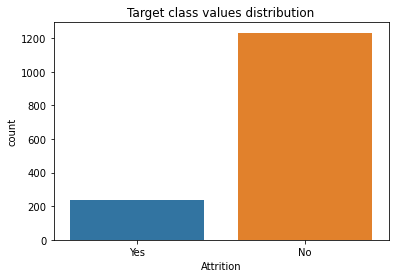

In [9]:
# checking Target colums values
print(hr_data["Attrition"].value_counts(),"\n")
sns.countplot(hr_data["Attrition"])
plt.title("Target class values distribution");

In [10]:
hr_data.groupby("Attrition")[["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate","PercentSalaryHike","TrainingTimesLastYear","TotalWorkingYears","YearsWithCurrManager"]].mean()


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TrainingTimesLastYear,TotalWorkingYears,YearsWithCurrManager
Attrition,,,,,,,,,,
No,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,15.231144,2.832928,11.862936,4.367397
Yes,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,15.097046,2.624473,8.244726,2.852321


Text(0.5, 1.0, 'BusinessTravel wise attrition')

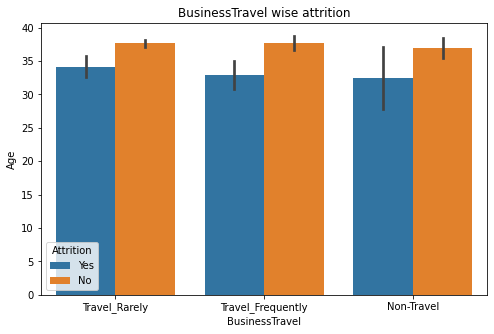

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x="BusinessTravel", y = "Age", data = hr_data,hue = "Attrition")
plt.title("BusinessTravel wise attrition")

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:ylabel='Department,Attrition'>

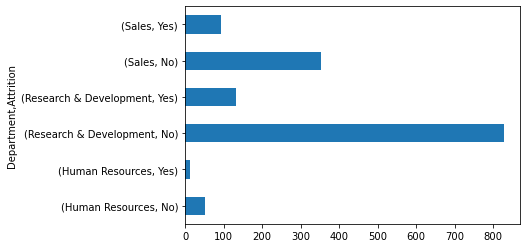

In [12]:
print(hr_data["Department"].value_counts())
hr_data.groupby(["Department","Attrition"])["Attrition"].count().plot(kind = "barh")


<AxesSubplot:xlabel='Attrition,EducationField'>

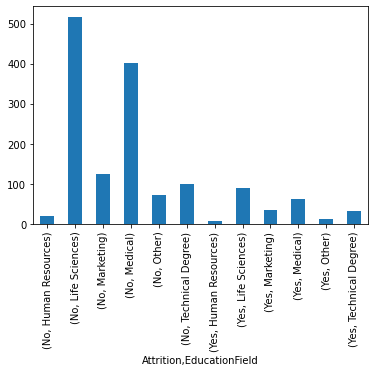

In [13]:
hr_data.groupby(["Attrition","EducationField"])["Attrition"].count().plot(kind = "bar")


<AxesSubplot:ylabel='Attrition,DistanceFromHome'>

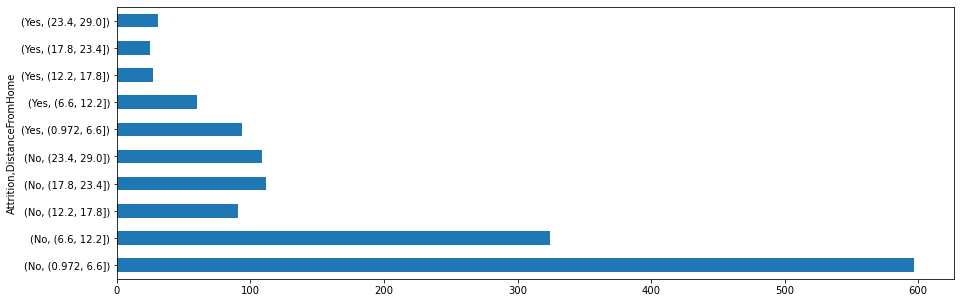

In [14]:
"""since distance columns range is wide, i want to check the attrition rate distance wise so have created bins.
i have created a seprated data for analysis purpose """
distance = pd.cut(hr_data["DistanceFromHome"],bins = 5)
for_analysis = pd.concat([hr_data["Attrition"],distance], axis =1, join = "inner")
plt.figure(figsize=(15,5))
for_analysis.groupby(["Attrition","DistanceFromHome"])["Attrition"].count().plot(kind = "barh")


"Education<br>\n1 'Below College'\n2 'College'\n3 'Bachelor'\n4 'Master'\n5 'Doctor'"

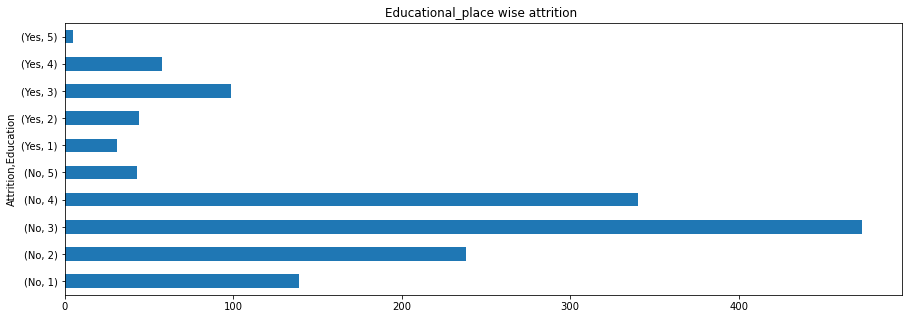

In [15]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","Education"])["Attrition"].count().plot(kind = "barh")
plt.title("Educational_place wise attrition ")
"""Education<br>
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'"""

"EnvironmentSatisfaction\n1 'Low'\n2 'Medium'\n3 'High'\n4 'Very High'"

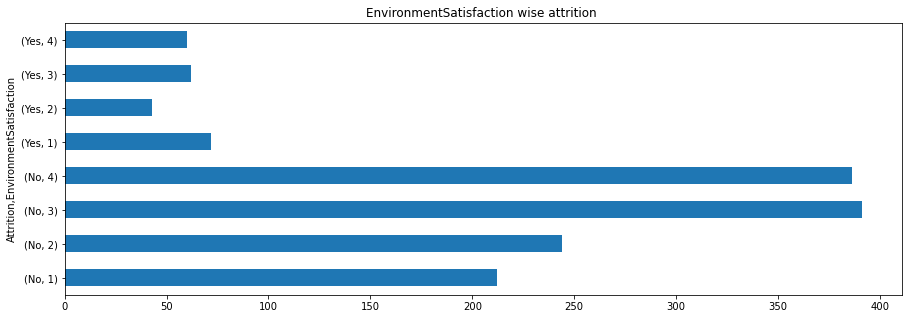

In [16]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","EnvironmentSatisfaction"])["EnvironmentSatisfaction"].count().plot(kind = "barh")
plt.title("EnvironmentSatisfaction wise attrition ");

"""EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'"""

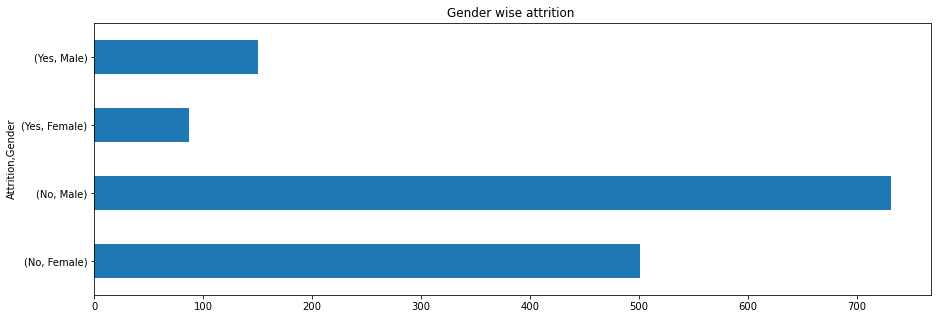

In [17]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","Gender"])["Gender"].count().plot(kind = "barh")
plt.title("Gender wise attrition ");

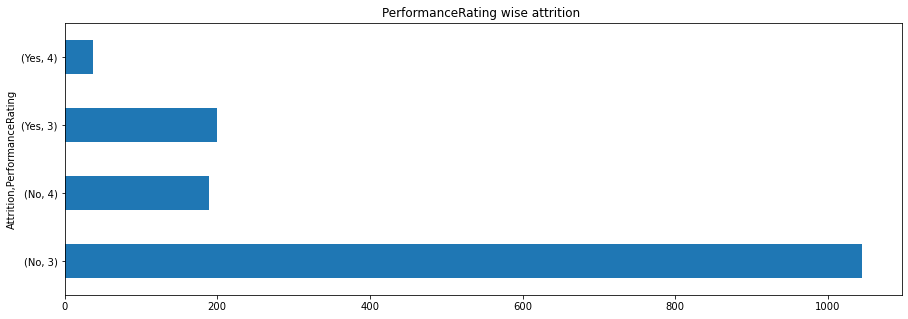

In [18]:
# PerformanceRating         
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","PerformanceRating"])["PerformanceRating"].count().plot(kind = "barh")
plt.title("PerformanceRating wise attrition ");

In [19]:
# for analysis purpose
hr_data1 = hr_data.copy()

<AxesSubplot:>

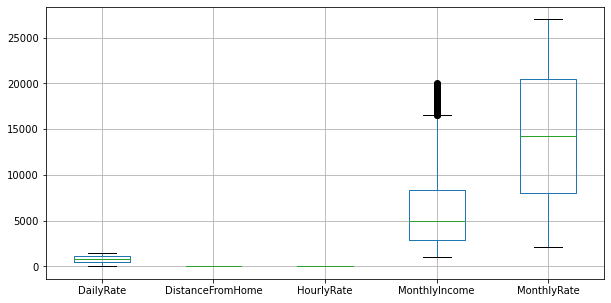

In [20]:
num_col_boxplot = hr_data1[["DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate"]]
num_col_boxplot.boxplot(figsize = (10,5))

<AxesSubplot:>

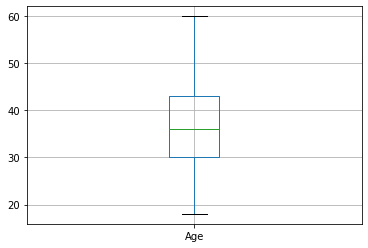

In [21]:
hr_data1.boxplot("Age")

<AxesSubplot:>

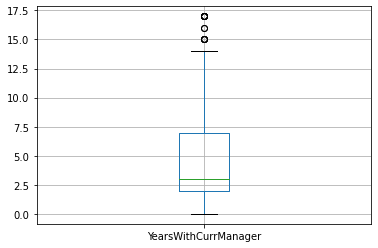

In [22]:
hr_data1.boxplot("YearsWithCurrManager")

<AxesSubplot:>

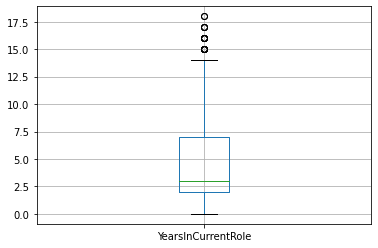

In [23]:
hr_data1.boxplot("YearsInCurrentRole")

In [24]:
hr_data1["DistanceFromHome"] =np.cbrt(hr_data1["DistanceFromHome"])
hr_data1["MonthlyIncome"] =np.log(hr_data1["MonthlyIncome"])

In [25]:
hr_data1[["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate"]].skew()


Age                 0.413286
DailyRate          -0.003519
DistanceFromHome    0.186998
HourlyRate         -0.032311
MonthlyIncome       0.286192
MonthlyRate         0.018578
dtype: float64

# Label Encodeing

In [26]:
object_columns.sample(10)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
213,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Director,Married,Y,No
1325,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
256,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Divorced,Y,Yes
1385,No,Travel_Rarely,Sales,Medical,Male,Sales Executive,Divorced,Y,No
963,No,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Divorced,Y,No
971,No,Travel_Rarely,Research & Development,Technical Degree,Female,Manufacturing Director,Single,Y,No
125,No,Travel_Rarely,Research & Development,Other,Female,Research Scientist,Married,Y,No
745,No,Travel_Frequently,Research & Development,Medical,Male,Healthcare Representative,Married,Y,Yes
321,No,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Divorced,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes


In [27]:
hr_data1["Attrition"] = hr_data1["Attrition"].replace({"Yes":1,"No":0}) 
hr_data1["Gender"] = hr_data1["Gender"].replace({"Female":0,"Male":1})
hr_data1["Department"] = hr_data1["Department"].replace({"Human Resources":0,"Research & Development":1,"Sales":2})
hr_data1["MaritalStatus"] = hr_data1["MaritalStatus"].replace({"Divorced":0,"Married":1,"Single":2})
hr_data1["OverTime"] = hr_data1["OverTime"].replace({"Yes":0,"No":1})
hr_data1["BusinessTravel"] = hr_data1["BusinessTravel"].replace({"Non-Travel":0,"Travel_Frequently":1,"Travel_Rarely":2})


In [28]:
edu = {'Life Sciences': 2,
         'Other': 1,
         'Medical':4 ,
         'Marketing': 3,
         'Technical Degree': 5,
         'Human Resources': 0}

jon_role = {'Sales Executive': 7,
         'Research Scientist': 5,
         'Laboratory Technician': 2,
         'Manufacturing Director': 3,
         'Healthcare Representative': 1,
         'Manager': 4,
         'Sales Representative': 8,
         'Research Director': 6,
         'Human Resources': 0}

In [29]:
hr_data1["EducationField"] = hr_data1["EducationField"].replace(edu)
hr_data1["JobRole"] = hr_data1["JobRole"].replace(jon_role)

In [30]:
hr_data1.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
844,30,0,2,852,2,2.154435,3,3,1,1179,...,1,80,1,10,3,3,10,3,1,4
1466,39,0,2,613,1,1.817121,1,4,1,2062,...,1,80,1,9,5,3,7,7,1,7
362,21,0,0,895,2,2.080084,2,4,1,484,...,3,80,0,3,3,2,3,2,2,2
1040,40,0,0,218,1,2.000000,1,4,1,1468,...,3,80,1,16,5,3,9,8,4,8
863,33,0,2,147,0,1.259921,3,0,1,1207,...,4,80,1,5,2,3,5,4,1,4


In [31]:
hr_data1.drop(columns =["Over18","EmployeeCount","EmployeeNumber","StandardHours"],axis =1, inplace = True)
# let check the relationship of the features


Text(0.5, 1.0, 'Correlation Plot')

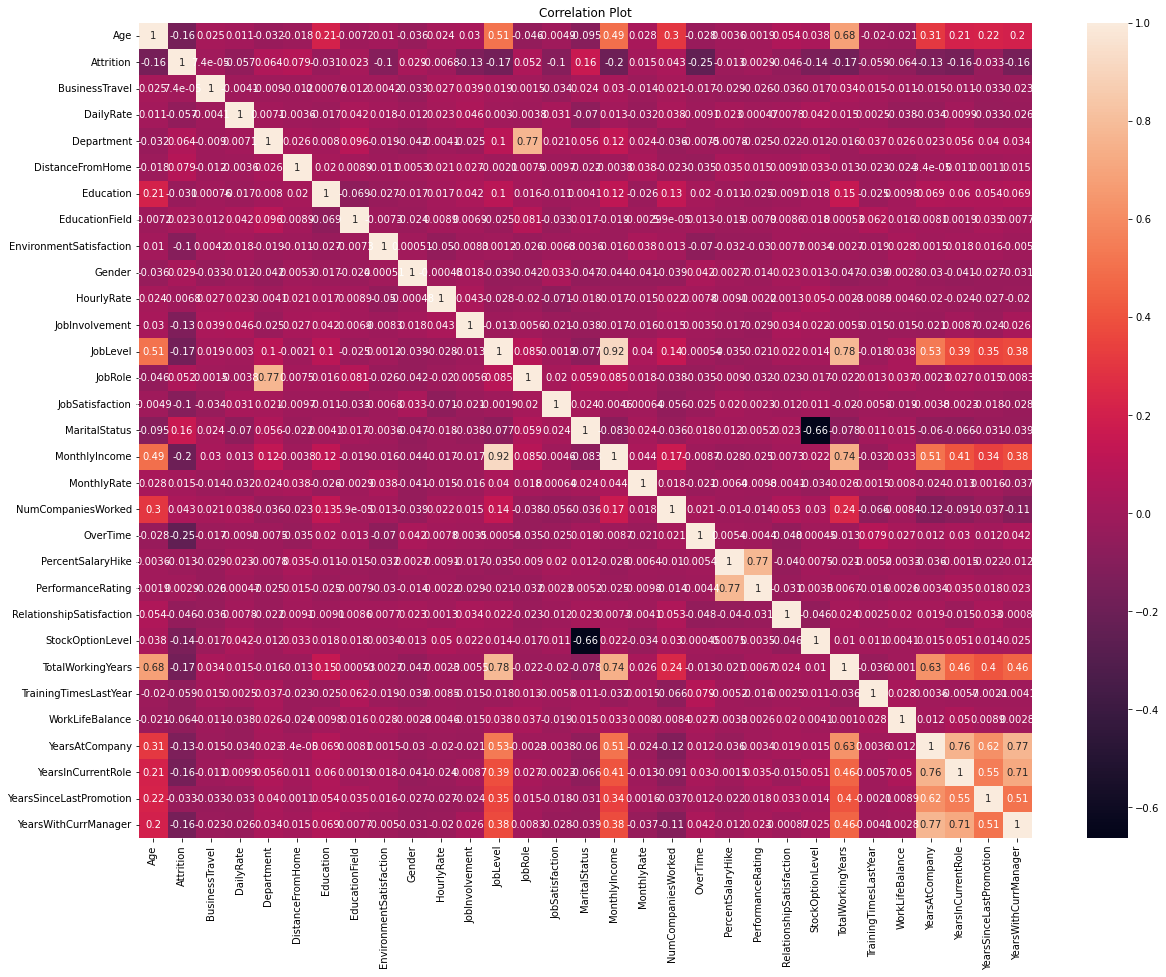

In [32]:
# let check the relationship of the features
plt.figure(figsize =(20,15))
sns.heatmap(hr_data1.corr(),annot= True)
plt.title("Correlation Plot")

<AxesSubplot:>

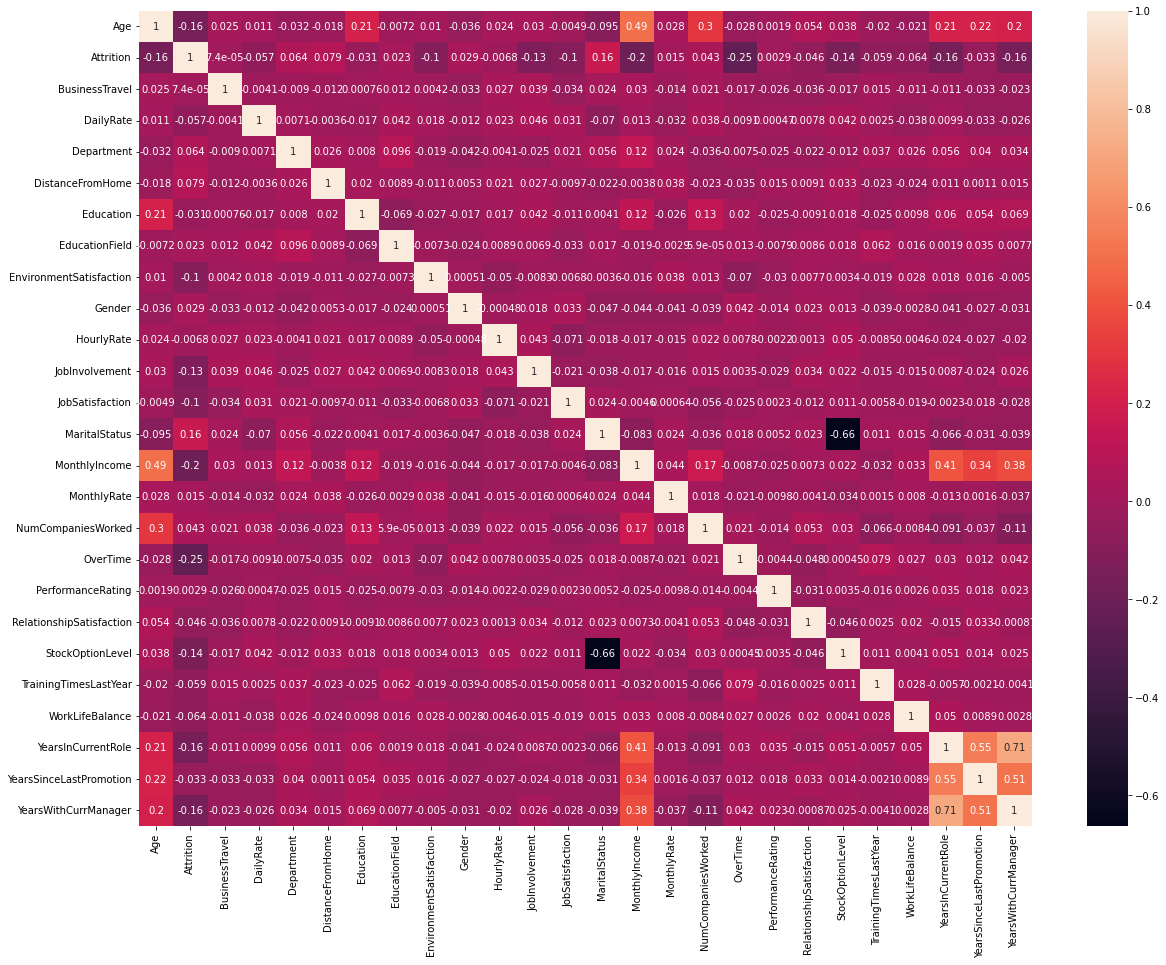

In [33]:
hr_data1.drop(columns =["YearsAtCompany","JobLevel","JobRole", "TotalWorkingYears","TotalWorkingYears","PercentSalaryHike"],axis =1,inplace = True)
plt.figure(figsize =(20,15))
sns.heatmap(hr_data1.corr(),annot= True)

In [34]:
# Handling imbalance data by oversampling

In [35]:
# Seprating data into X and y
X = hr_data1.drop("Attrition",axis =1)
y = hr_data1["Attrition"]

In [36]:
# implementing oversampling for handling imbalance data
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state = 40)
res_X,res_y = smote.fit_sample(X,y)

In [37]:
# Modeling

In [38]:
for i in range(50,500,75):
    RF = RandomForestClassifier()
    X_train,X_test,y_train,y_test = train_test_split(res_X,res_y,test_size = 0.2, random_state=i)
    RF.fit(X_train,y_train)
    print("training score: ",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("Test score: ",RF.score(X_test,y_test),"Random_state",i)
    print("Accuracy :",accuracy_score(pred,y_test))
    print("Roc_auc_score :",roc_auc_score(pred,y_test))
    print("confuion_matrix", "\n",confusion_matrix(pred,y_test))
    print("classification_report", "\n",classification_report(pred,y_test))


training score:  1.0 Random_state 50
Test score:  0.9229024943310657 Random_state 50
Accuracy : 0.9229024943310657
Roc_auc_score : 0.9228609625668449
confuion_matrix 
 [[199  21]
 [ 13 208]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       220
           1       0.91      0.94      0.92       221

    accuracy                           0.92       441
   macro avg       0.92      0.92      0.92       441
weighted avg       0.92      0.92      0.92       441

training score:  1.0 Random_state 125
Test score:  0.9138321995464853 Random_state 125
Accuracy : 0.9138321995464853
Roc_auc_score : 0.9150202111862729
confuion_matrix 
 [[207  25]
 [ 13 196]]
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       232
           1       0.89      0.94      0.91       209

    accuracy                           0.91       441
   macro avg       0.91

In [39]:
# GridSearchCV

In [40]:

models = [LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier()]
for model in models:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(res_X,res_y,test_size = 0.2, random_state=275)
    model.fit(X_train1,y_train1)
    print("training score: ",model.score(X_train1,y_train1),"Model",model)
    pred = model.predict(X_test1)
    print("Test score: ",RF.score(X_test1,y_test1))
    print("Accuracy :",accuracy_score(pred,y_test1))
    print("Roc_auc_score :",roc_auc_score(pred,y_test1))
    print("confuion_matrix", "\n",confusion_matrix(pred,y_test1))
    print("classification_report", "\n",classification_report(pred,y_test1))

training score:  0.7535491198182851 Model LogisticRegression()
Test score:  0.9886621315192744
Accuracy : 0.7482993197278912
Roc_auc_score : 0.7480490523968785
confuion_matrix 
 [[176  58]
 [ 53 154]]
classification_report 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       234
           1       0.73      0.74      0.74       207

    accuracy                           0.75       441
   macro avg       0.75      0.75      0.75       441
weighted avg       0.75      0.75      0.75       441

training score:  1.0 Model RandomForestClassifier()
Test score:  0.9886621315192744
Accuracy : 0.9229024943310657
Roc_auc_score : 0.9260204081632653
confuion_matrix 
 [[220  25]
 [  9 187]]
classification_report 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       245
           1       0.88      0.95      0.92       196

    accuracy                           0.92       441
   macro avg    

In [41]:
para = {"n_estimators":[100,200,300,400],
       "max_depth":[2,3,4],
       "max_features":["auto", "sqrt", "log2"]}
grid_RF = RandomForestClassifier()
grid_RF = GridSearchCV(grid_RF,para,scoring = "f1",cv =10,n_jobs = -1, verbose =2)
grid_RF.fit(X_train1,y_train1)
print(grid_RF.best_score_)
print(grid_RF.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
0.8724486114005275
{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 400}


In [42]:
# cross validation

In [43]:
grid_RF = RandomForestClassifier(max_depth= 4, max_features ='log2', n_estimators =400)
for i in range(2,10):
    cross_score = cross_val_score(grid_RF,res_X,res_y,scoring = "f1",cv =i)
    print("CV",i,"mean",cross_score.mean(),"std",cross_score.std())


CV 2 mean 0.8628771080379491 std 0.04052181861679144
CV 3 mean 0.8618203576778557 std 0.0654078436033149
CV 4 mean 0.8594779863105986 std 0.08309424718598005
CV 5 mean 0.857721224708355 std 0.09952903830618451
CV 6 mean 0.8626026762777795 std 0.09762965075165031
CV 7 mean 0.8634750006661465 std 0.08910462280707031
CV 8 mean 0.8654734125987591 std 0.08959180984174274
CV 9 mean 0.8643944304951042 std 0.09648880955084092


In [44]:
# Model Saving

In [45]:
import pickle
grid_RF.fit(res_X,res_y)
filename = "HR_Attrition_Analytic.pkl"
with open(filename,"wb") as f:
    pickle.dump(grid_RF,f)